In [2]:
# import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import statistics

In [3]:
# import table
mm = # data...
mm

,journal,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,total_use_count,reuse_role
0,Alzheimers_Res_Ther,PMC3707052,GSM1,GSE506,GEO,2013-4-18,2000-09-28,Homo sapiens,SAGE NlaIII,Expression_Array,NaN,NaN,NaN,64,R
1,Alzheimers_Res_Ther,PMC3706879,GSE45534,GSE45534,GEO,2013-5-14,2004-05-25,Mus musculus,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,1,G
2,Alzheimers_Res_Ther,PMC4255636,GSE5281,GSE5281,GEO,2014-11-2,2003-11-07,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,43,R
3,Alzheimers_Res_Ther,PMC4731966,GSE67036,GSE67036,GEO,2016-1-28,2013-05-06,Rattus norvegicus,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,1,G
4,Alzheimers_Res_Ther,PMC4731966,GSE1297,GSE1297,GEO,2016-1-28,2002-03-11,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,32,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73485,Dis_Markers,PMC6589307,GSE14795,GSE14795,GEO,2019-6-4,2002-03-11,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,1,G
73486,Dis_Markers,PMC6589301,GSE62254,GSE62254,GEO,2019-6-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,R
73487,Dis_Markers,PMC3834650,GDS1059,GSE2191,GEO,2013-11-5,2009-03-16,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,5,G
73488,Case_Rep_Hematol,PMC6462343,PRJNA437812,SRP135146,SRA,2019-3-31,2018-03-13,human gut metagenome,Illumina MiSeq,AMPLICON,602.0,17743348.0,public,1,G


In [4]:
# for each DATASET:

# how many times is each dataset used?
# take the slice we need from mm
accs = mm[['converted_accession', 'repository', 'total_use_count']].drop_duplicates()
accs

,converted_accession,repository,total_use_count
0,GSE506,GEO,64
1,GSE45534,GEO,1
2,GSE5281,GEO,43
3,GSE67036,GEO,1
4,GSE1297,GEO,32
...,...,...,...
73475,GSE85841,GEO,1
73478,GPL20115,GEO,1
73483,GSE73953,GEO,1
73485,GSE14795,GEO,1


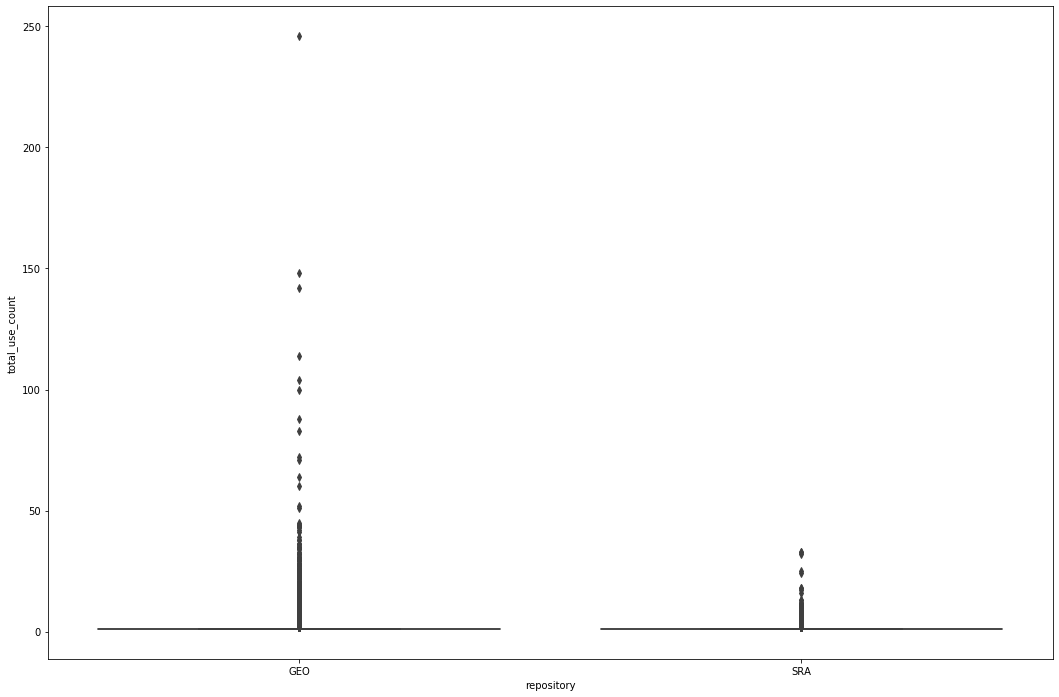

In [5]:
# plot distribution of use for each unique dataset
# each point is a dataset
fig_dims = (18,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = accs, x = 'repository', y = 'total_use_count', ax = ax)

In [7]:
# what percentage of datasets are used more than once (re-used at least once)?

accs['wasReused'] = accs['total_use_count'] > 1

accs = accs.groupby('repository', as_index = False).agg({'wasReused':'mean'})
accs = accs.rename(columns = {'wasReused':'pctReused'})
accs

,repository,pctReused
0,GEO,0.229741
1,SRA,0.132268


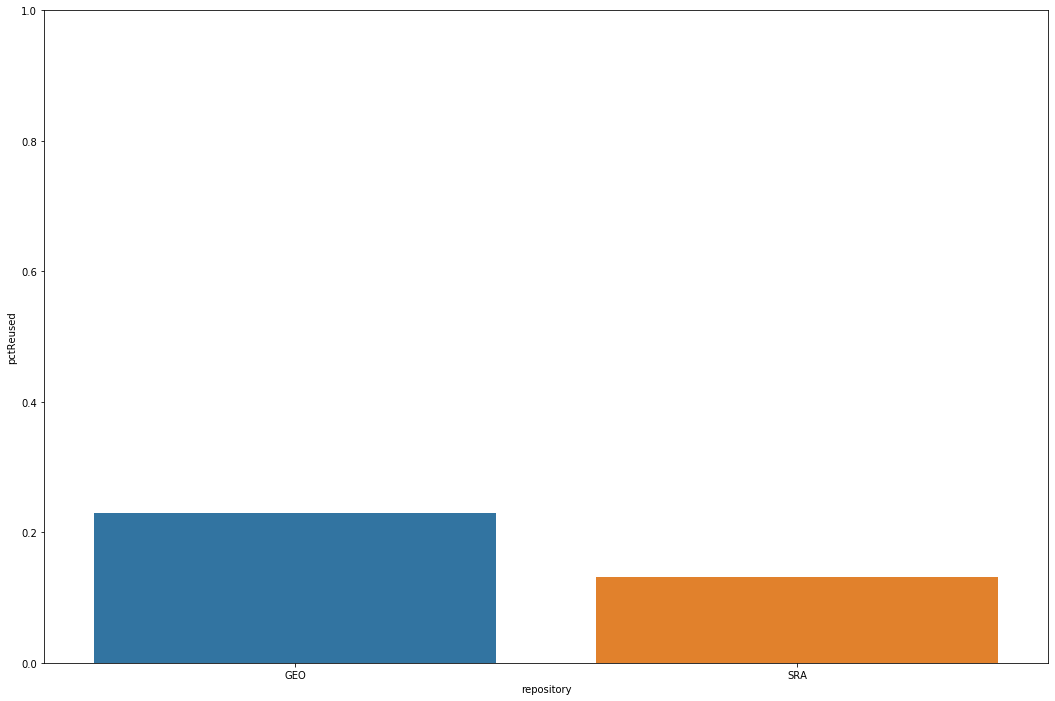

In [8]:
# plot barplot showing percentage of datasets reused in GEO and SRA
fig_dims = (18,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = accs, x = 'repository', y = 'pctReused', ax = ax)
plt.ylim(0,1)
plt.show()

In [45]:
# define function defining each paper as a GEO or SRA paper...
# ...based on which is mentioned more, or 'Both' if score is equal
def getMode(items):
    try:
        r = statistics.mode(items)
    except:
        r = 'Both'
    return r

In [46]:
# Look at each PAPER

# how many papers reuse and generate in the same paper?

roles = mm[['pmc_ID', 'repository', 'reuse_role']]
roles

,pmc_ID,repository,reuse_role
0,PMC3707052,GEO,R
1,PMC3706879,GEO,G
2,PMC4255636,GEO,R
3,PMC4731966,GEO,G
4,PMC4731966,GEO,R
...,...,...,...
73485,PMC6589307,GEO,G
73486,PMC6589301,GEO,R
73487,PMC3834650,GEO,G
73488,PMC6462343,SRA,G


In [47]:
roles = roles.groupby(['pmc_ID'], as_index = False).agg({'repository': lambda x: getMode(x), 
                                                       'reuse_role': lambda r: getMode(r)})
# roles = roles.groupby(['pmc_ID'], as_index = False)
roles

,pmc_ID,repository,reuse_role
0,PMC1079818,GEO,G
1,PMC1082884,GEO,R
2,PMC1088941,GEO,G
3,PMC1088946,GEO,G
4,PMC1090574,GEO,G
...,...,...,...
26180,PMC6639121,SRA,R
26181,PMC6639415,GEO,G
26182,PMC6640630,GEO,G
26183,PMC6646343,GEO,G


In [48]:
i = 0
for r in roles['reuse_role']:
    if r == 'Both':
        i = i+1
        
i

1292

In [49]:
i = 0
for r in roles['repository']:
    if r == 'Both':
        i = i+1

i

327

In [7]:
# Across GEO and SRA, what percentage of papers reuse data? (stacked bar chart)

# Take a slice of allFactors with the data we want
byPaper = mm[['pmc_ID', 'repository', 'total_use_count']]
byPaper = byPaper.dropna(subset = ['repository'])
byPaper = byPaper.groupby(['pmc_ID'], as_index = False).agg({
    'repository': lambda x: getRepo(x), 'total_use_count': 'mean'})
byPaper.columns = ['pmc_ID', 'repository', 'avg_use']

# divide into GEO, SRA, Both
byPaperGEO = byPaper.loc[byPaper['repository'] == 'GEO']
byPaperSRA = byPaper.loc[byPaper['repository'] == 'SRA']
byPaperBOTH = byPaper.loc[byPaper['repository'] == 'Both']

byPaper

,pmc_ID,repository,avg_use
0,PMC1079818,Both,1.000000
1,PMC1082884,Both,2.000000
2,PMC1088941,Both,2.000000
3,PMC1088946,Both,2.000000
4,PMC1090574,Both,1.400000
...,...,...,...
26180,PMC6639121,Both,2.000000
26181,PMC6639415,Both,1.666667
26182,PMC6640630,Both,1.000000
26183,PMC6646343,Both,1.000000


In [8]:
tc = Counter(byPaper['avg_use'])
totalCounts = pd.DataFrame.from_dict(tc, orient = 'index').reset_index()

gc = Counter(byPaperGEO['avg_use'])
geoCounts = pd.DataFrame.from_dict(gc, orient = 'index').reset_index()

sc = Counter(byPaperSRA['avg_use'])
sraCounts = pd.DataFrame.from_dict(sc, orient = 'index').reset_index()

bc = Counter(byPaperBOTH['avg_use'])
bothCounts = pd.DataFrame.from_dict(bc, orient = 'index').reset_index()

for df in [totalCounts, geoCounts, sraCounts, bothCounts]:
    df.columns = ['avg_use', 'num_papers']
    df = df.sort_values(by = 'times_used').reset_index().drop(labels = ['index'], axis = 1)
    # no_reuse is number of papers only mentioning datasets used once
    no_reuse = df['num_papers'][0]
    # tot_papers includes all papers, including those that mentioned at least one reused dataset
    tot_papers = df['num_papers'].sum()
    pct_reuse_papers = 1 - no_reuse/tot_papers
    print(pct_reuse_papers)

NameError: name 'Counter' is not defined